<a href="https://colab.research.google.com/github/RichardKameri/Ml1/blob/main/Easy_visa_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EasyVisa Project
Context:
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions.

Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application
continent: Information of continent the employee
education_of_employee: Information of education of the employee
has_job_experience: Does the employee has any job experience? Y= Yes; N = No
requires_job_training: Does the employee require any job training? Y = Yes; N = No
no_of_employees: Number of employees in the employer's company
yr_of_estab: Year in which the employer's company was established
region_of_employment: Information of foreign worker's intended region of employment in the US.
prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
case_status: Flag indicating if the Visa was certified or denied

Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [6]:
df = pd.read_csv('/content/EasyVisa.csv')

DATA OVERVIEW

In [7]:
# Preview the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
# Get row and column count
df.shape

(25480, 12)

In [9]:
# Check for any null values
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
# Review datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [12]:
# Collect all the object datatypes
cols=df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [13]:
# Change object columns to category datatype
for i in cols.columns:
    df[i]= df[i].astype('category')

In [14]:
# Review datatypes for each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [15]:
# Statistical summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


The average number of employees at a business is 5,667, while the median is 2,109 employees.
The IQR range for year business started is 1976-2016. Ths column has some major outliers that are skewing the data to the left.
Average wage of an employee is 74,455, while the median wage is 70,308.

In [16]:
# Drop case_id since it is not relevant to the model
df.drop(['case_id'],axis=1,inplace=True)

In [17]:
# Statistical summary of categorical data
df.describe(include=['category']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Summary

There are no missing or duplicate values.
I converted the object type columns into categories.
Dropped the ID column since it is a unique value for each row.
Updated prevailing wage column to absolute values

In [18]:
# Create a dataframe of call categorical data
cols_cat=df.select_dtypes(['category'])

In [19]:
# Get percentage breakdown oof categorial variables
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize=True))
    print('*'*50)

Unique values in continent are :
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
**************************************************
Unique values in requires_job_training are :
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64
**************************************************
Unique values in region_of_employment are :
region_of_employment
Northeast    0.282378
South        0.275392
West     

Exploratory Data Analysis (EDA)
EDA is an important part of any project involving data.
It is important to investigate and understand the data better before building a model with it.
A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
A thorough analysis of the data, in addition to the questions mentioned below, should be don

In [20]:
# Function to build histogram and boxplot together
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# Function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
# Function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Univariate
Leading Questions:

Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

How does the** visa** status vary across different continents?

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

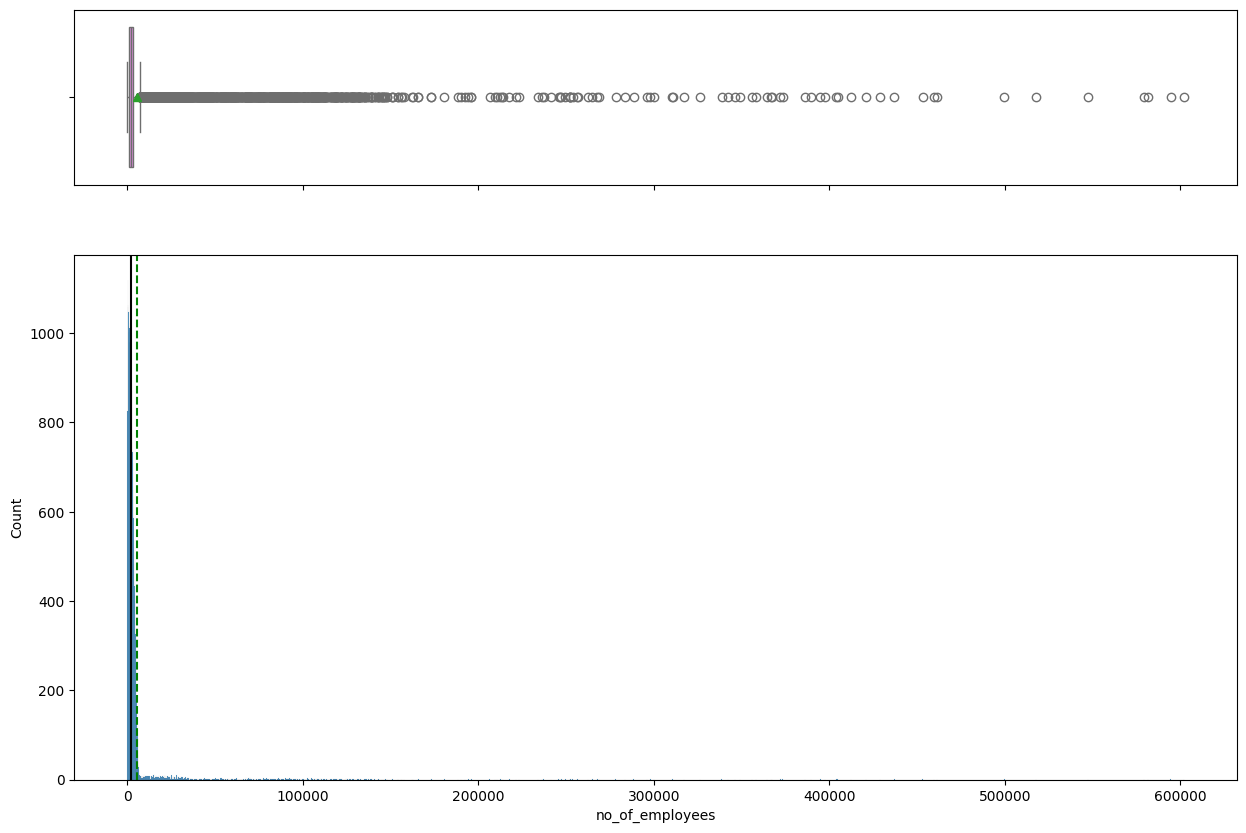

In [24]:
# Visualize the number of employees
histogram_boxplot(df, 'no_of_employees')

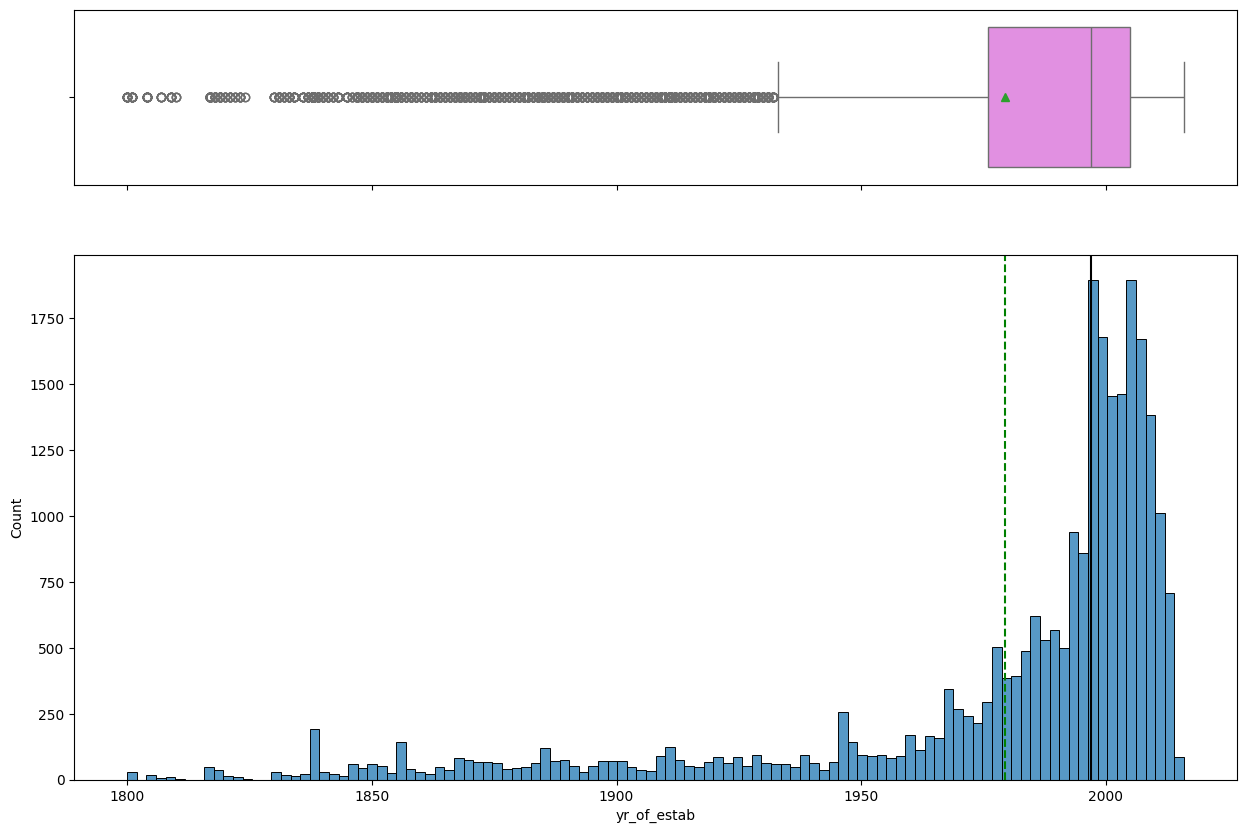

In [29]:
# Visualize year of establishment
histogram_boxplot(df, 'yr_of_estab')

In [30]:
# Locate all values under $100
df.loc[df['prevailing_wage']<=100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [31]:
# Locate all columns with unit of wage "hour"
df.loc[df['unit_of_wage']=='Hour']

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
54,Asia,Master's,Y,N,11733,1995,Northeast,230.8072,Hour,Y,Certified
62,Asia,High School,N,N,5110,2004,West,103.2216,Hour,Y,Denied
70,Asia,High School,Y,N,1320,2001,Northeast,230.3270,Hour,Y,Denied
...,...,...,...,...,...,...,...,...,...,...,...
25444,South America,Master's,Y,N,1081,1838,Northeast,156.6070,Hour,Y,Certified
25450,Asia,Bachelor's,N,N,3312,2009,Northeast,682.1048,Hour,Y,Denied
25461,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified


Prevailing wage is an odd column due to how wages are stored in the system.
Each unit of wage is stored the same, but not scaled accordingly.
It would be false to remove the low values, so the data will stay as is.

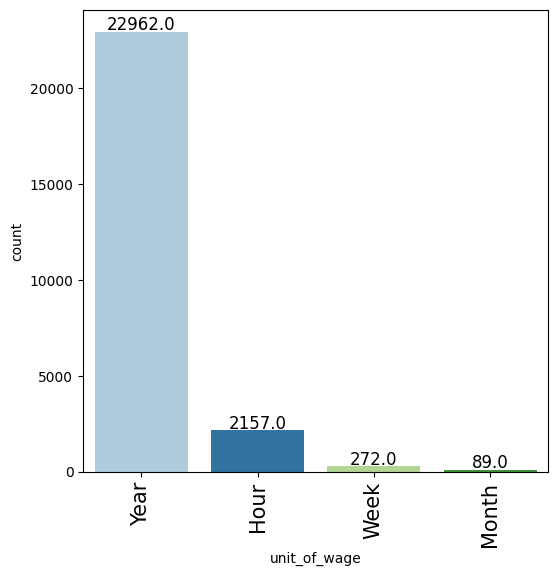

In [32]:
# Visualize unit of wage
labeled_barplot(df, 'unit_of_wage')

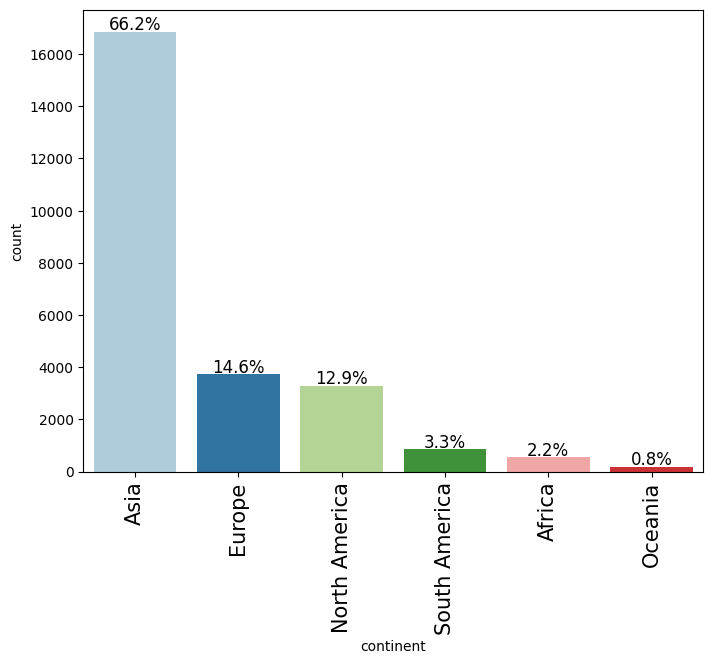

In [33]:
# Visualize continents represented
labeled_barplot(df, 'continent', perc=True)

66% of Visa applications are coming from the Asia continent.
This is almost two times greater than all the other continents listed combined.
It would have been helpful if the data was pulled by country, rather than continent.

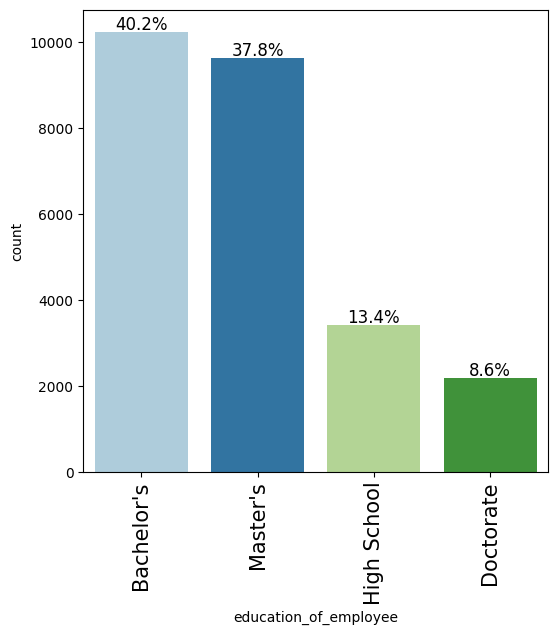

In [34]:
# Visualize education levels of employees
labeled_barplot(df, 'education_of_employee', perc=True)

This type of data is ranked: High School:0, Bachelor's:1, Master's:2, Doctorate 3.
The most common education level is Bachelor's and Master's is second with a 2.4% difference.

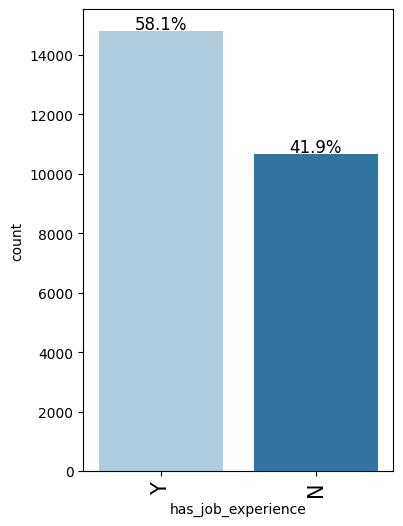

In [35]:
# Visualize if employees have job experience
labeled_barplot(df, 'has_job_experience', perc=True)

58.1% of applicants have job experience, while 41.9% have no experience

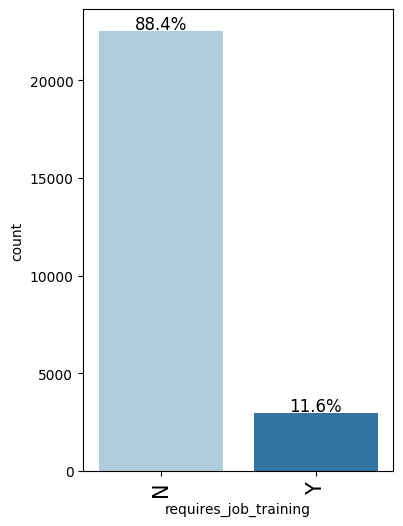

In [36]:
 # Visualize if job training is required
labeled_barplot(df, 'requires_job_training', perc=True)

Only 11.6% of Visa applicants require additional training.
It would have been helpful to know the employment field that requires training.

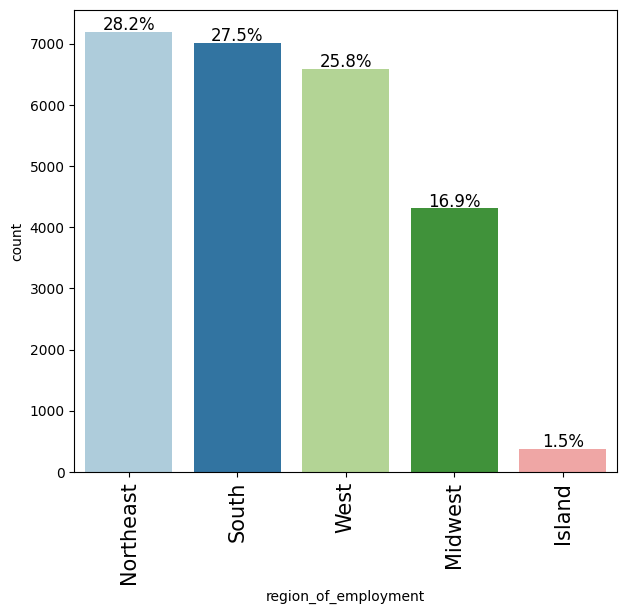

In [37]:
#  Visualize region of employment
labeled_barplot(df, 'region_of_employment', perc=True)

The top 3 regions account for 81.5% of applicants.
Most will be working in the Northeast, South, or West

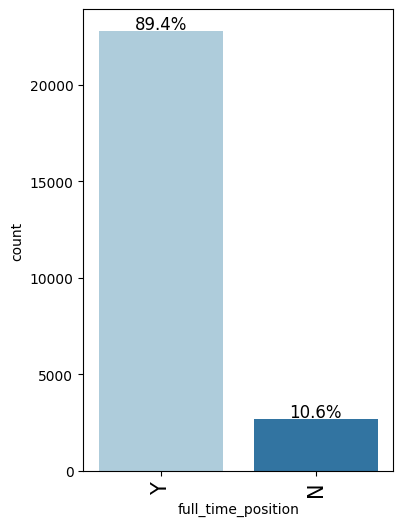

In [38]:
# Visualize if job is full time employment
labeled_barplot(df, 'full_time_position', perc=True)

A high majority of applicants are seeking full time employment

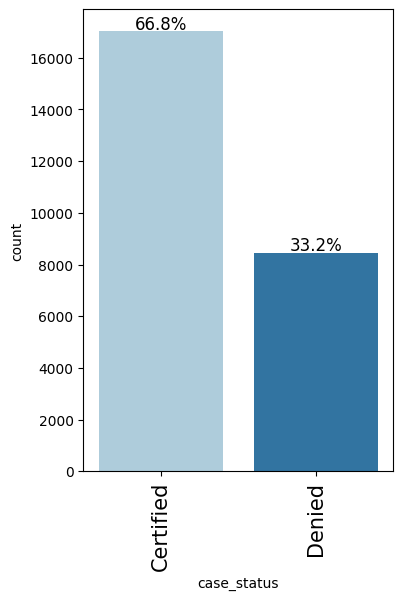

In [39]:
# Visualize case status
labeled_barplot(df, 'case_status', perc=True)

66.8% of all Visa applications are approved. This is 17018 applicants approved.

Case status is our target variable with 66% of Visas being certified.
In most Visa cases, employees salaries are categorized yearly.
Most Visa cases are for full time positions and do not require traveling for work.
58% of applicants have job experience.
88% of jobs do not require additional training.

Bivariate Analysis

In [43]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


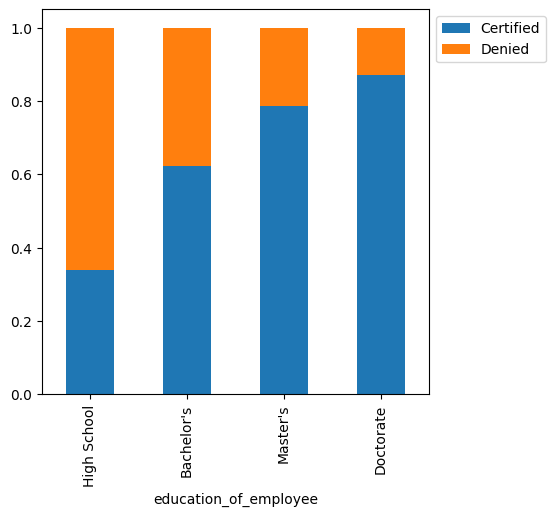

In [44]:
# Visualize case status by education of employee
stacked_barplot(df,'education_of_employee','case_status' )

up with the lowest certified visa status is high school diploma holders. Those more likely to be certified are those with doctorate degrees. Out of Bachelor's degree holders, 60% are certified

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


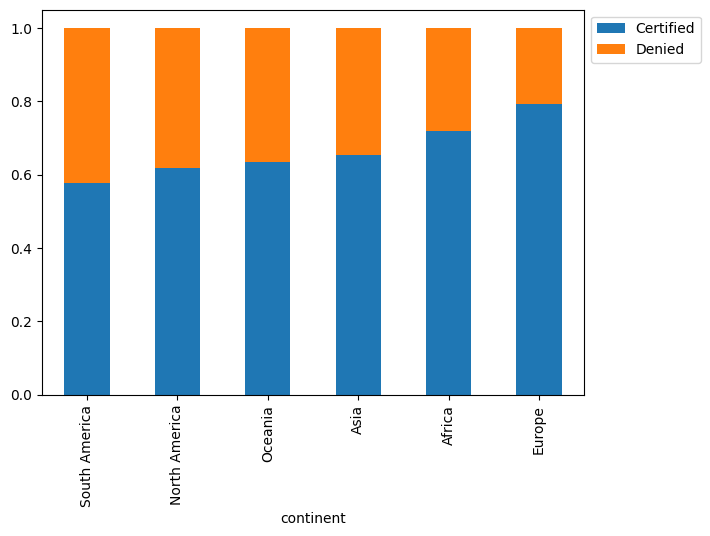

In [45]:
# Visualize case status by their continent
stacked_barplot(df,'continent','case_status' )

The continent with the most approved visas is Europe. All countries have a certification rate of at least 58% of their applicants. The group with the lowest certified rate is South America

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


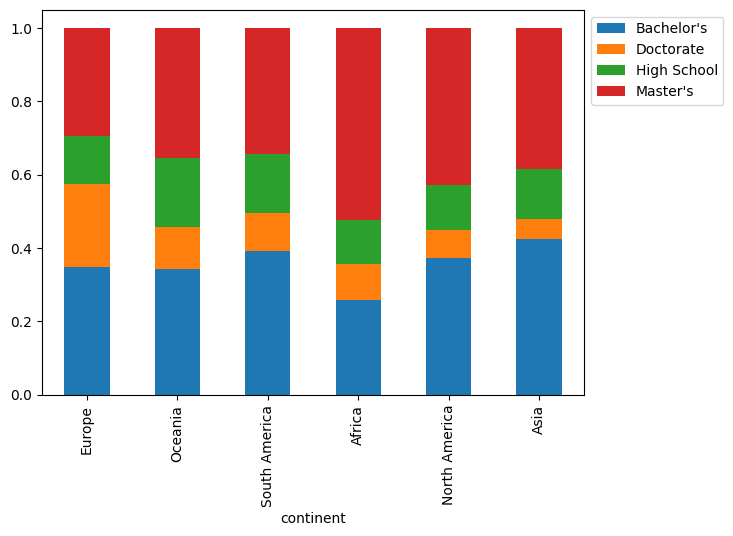

In [46]:
# Visualize education of employee by continent
stacked_barplot(df, "continent", "education_of_employee")


Europe, the continent with the highest certification rate, also has the most Doctorate holders. South Africa has the highest number of Master's applicants.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


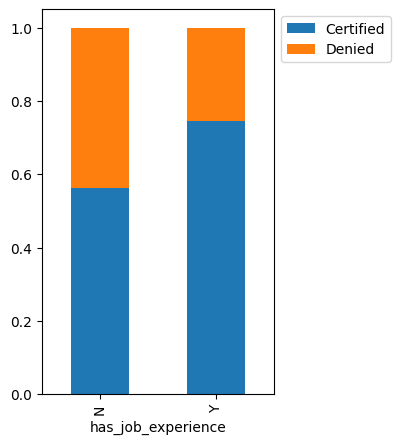

In [47]:
# Visualize case status by if they have job experience
stacked_barplot(df,'has_job_experience','case_status' )


Out of applicants that have job experience 74% are certified. Those without experience 56% are certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


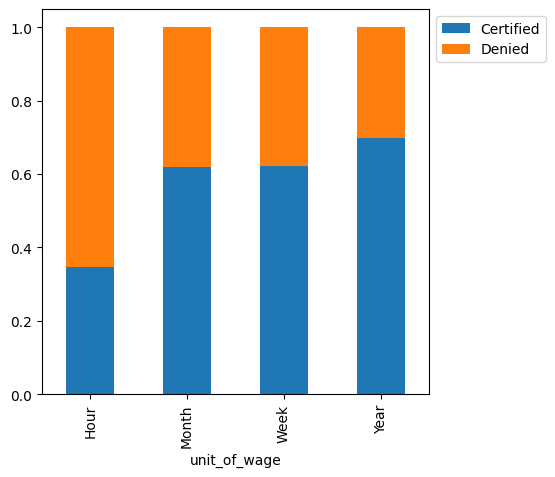

In [48]:
# Visualize case status by unit of wage
stacked_barplot(df,'unit_of_wage','case_status' )

Those applicants that would be paid an hourly wage are approved less frequently than other applicants. The visa certification rate is consistent across other unit of wages

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


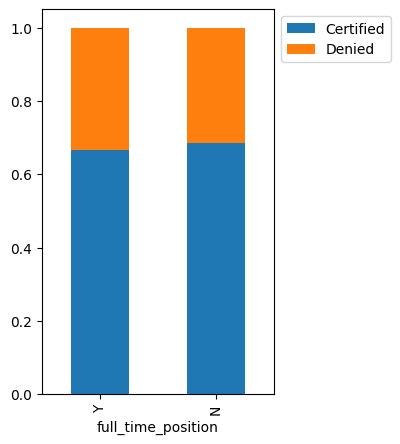

In [50]:
# Visualize case status by full time position
stacked_barplot(df, 'full_time_position','case_status',)

The certification rate between full time and part time employment are very similar

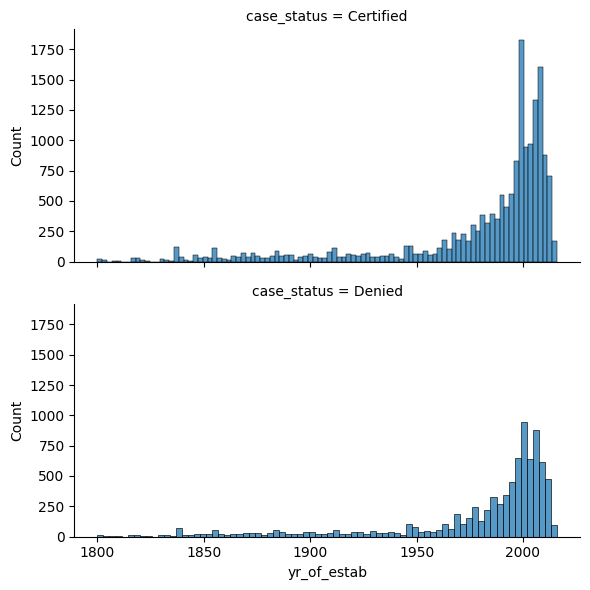

In [51]:
#Compare case status by year of company establishment
g=sns.FacetGrid(df, col='case_status', col_wrap=1, margin_titles=True, aspect=2)
g.map(sns.histplot, 'yr_of_estab');

This graph seems to indicate that as more companies came to be in the 1980's and 1990's there were more visas certified. Visa denials are binomial with most denied cases falling between the late 1990s and early 2000s.

<Axes: xlabel='case_status', ylabel='prevailing_wage'>

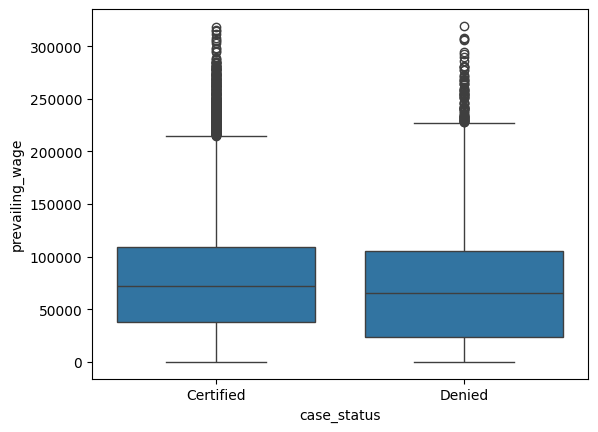

In [52]:
# Compare distribution of case status by prevailing wage
sns.boxplot(data=df, x='case_status', y='prevailing_wage')

This graph would seem to indicate that prevailing wage is less of a factor of visa certification/denial compared to things like unit of wage or level of education. This could be because some highly educated individuals might be taking jobs with lower wages.

<Axes: xlabel='education_of_employee', ylabel='count'>

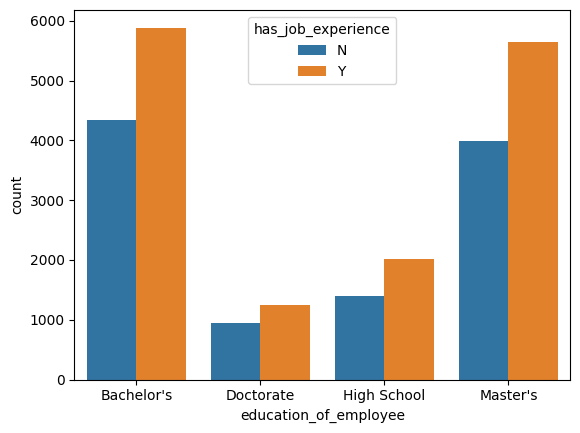

In [53]:
#  Compare the job experience of employees to their level of education
sns.countplot(data=df, x='education_of_employee', hue='has_job_experience')

Across the different levels of education, a majority of individuals have work experience. Since the higher level of education means longer years in school, you would expect there to be less experience among Master's and Doctorate applicants. However there is only a slight increase in the proportion of no experience applicants in these two variables

Summary

Evaluating the independent variables against our dependent variable (case status) created a clear picture of factors that greatly impact chances of visas being denied such as:

Level of education
If you are paid hourly
If you had no job experience
The other variables like continent or prevaling wage saw slight variation between variables.